# Columns Explanation

- Pregnancies -  Number of times the patient has been pregnant.
- Glucose - Plasma glucose concentration (mg/dL) after a 2-hour oral glucose tolerance test.
- BloodPressure - Diastolic blood pressure (mm Hg).
- SkinThickness - Thickness of the triceps skin fold (in mm).
- Insulin - 2-hour serum insulin level (μU/mL).
- BMI - Body Mass Index = weight (kg) / height² (m²).
- DiabetesPedigreeFunction - A function that scores the likelihood of diabetes based on family history (genetic predisposition).
- Age - Age of the patient (in years).
- Outcome - Target variable — whether the patient has diabetes or not.
    

# Hypotheses

- Patients with high BMI and high Glucose are more likely to be diabetic.
- Younger patients with high Glucose levels may still have a lower diabetes rate.
- Diabetes Pedigree Function has more influence in younger patients.
- A Glucose level above 125 is a strong indicator of diabetes.
- Most diabetic patients fall in Age group 30–50.
- Low insulin values and low skin thickness may indicate non-diabetic.
- Pregnancies have a stronger link to diabetes in patients over 30 years old.
- Patients with both high BloodPressure and high BMI are at higher risk.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

- Insulin vs. Skin Thickness (0.44) – Higher insulin resistance links to increased fat deposition.
- BMI vs. Skin Thickness (0.39) – Higher BMI correlates with thicker skin folds (indicator of obesity).
- Glucose vs. Outcome (0.47) – Higher blood sugar levels strongly predict diabetes.
- Diabetes Pedigree Function vs. Blood Pressure (0.041) – Family history of diabetes doesn’t strongly correlate with BP.
- Insulin vs. Outcome (0.13) – Insulin levels alone are a weaker predictor of diabetes than glucose.
- Pregnancies vs. Blood Pressure (-0.082) – Number of pregnancies has almost no link to BP changes.

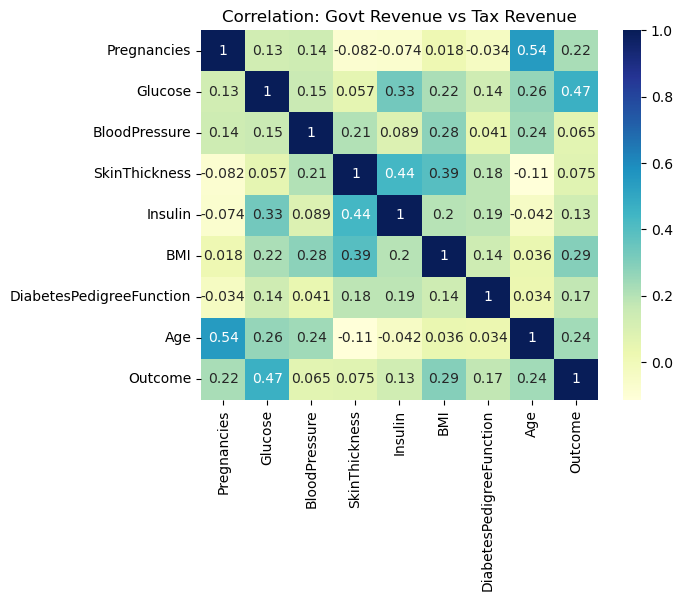

In [18]:
corr_subset = df.corr()
sns.heatmap(corr_subset, annot=True, cmap='YlGnBu')
plt.title('Correlation: Govt Revenue vs Tax Revenue')
plt.show()

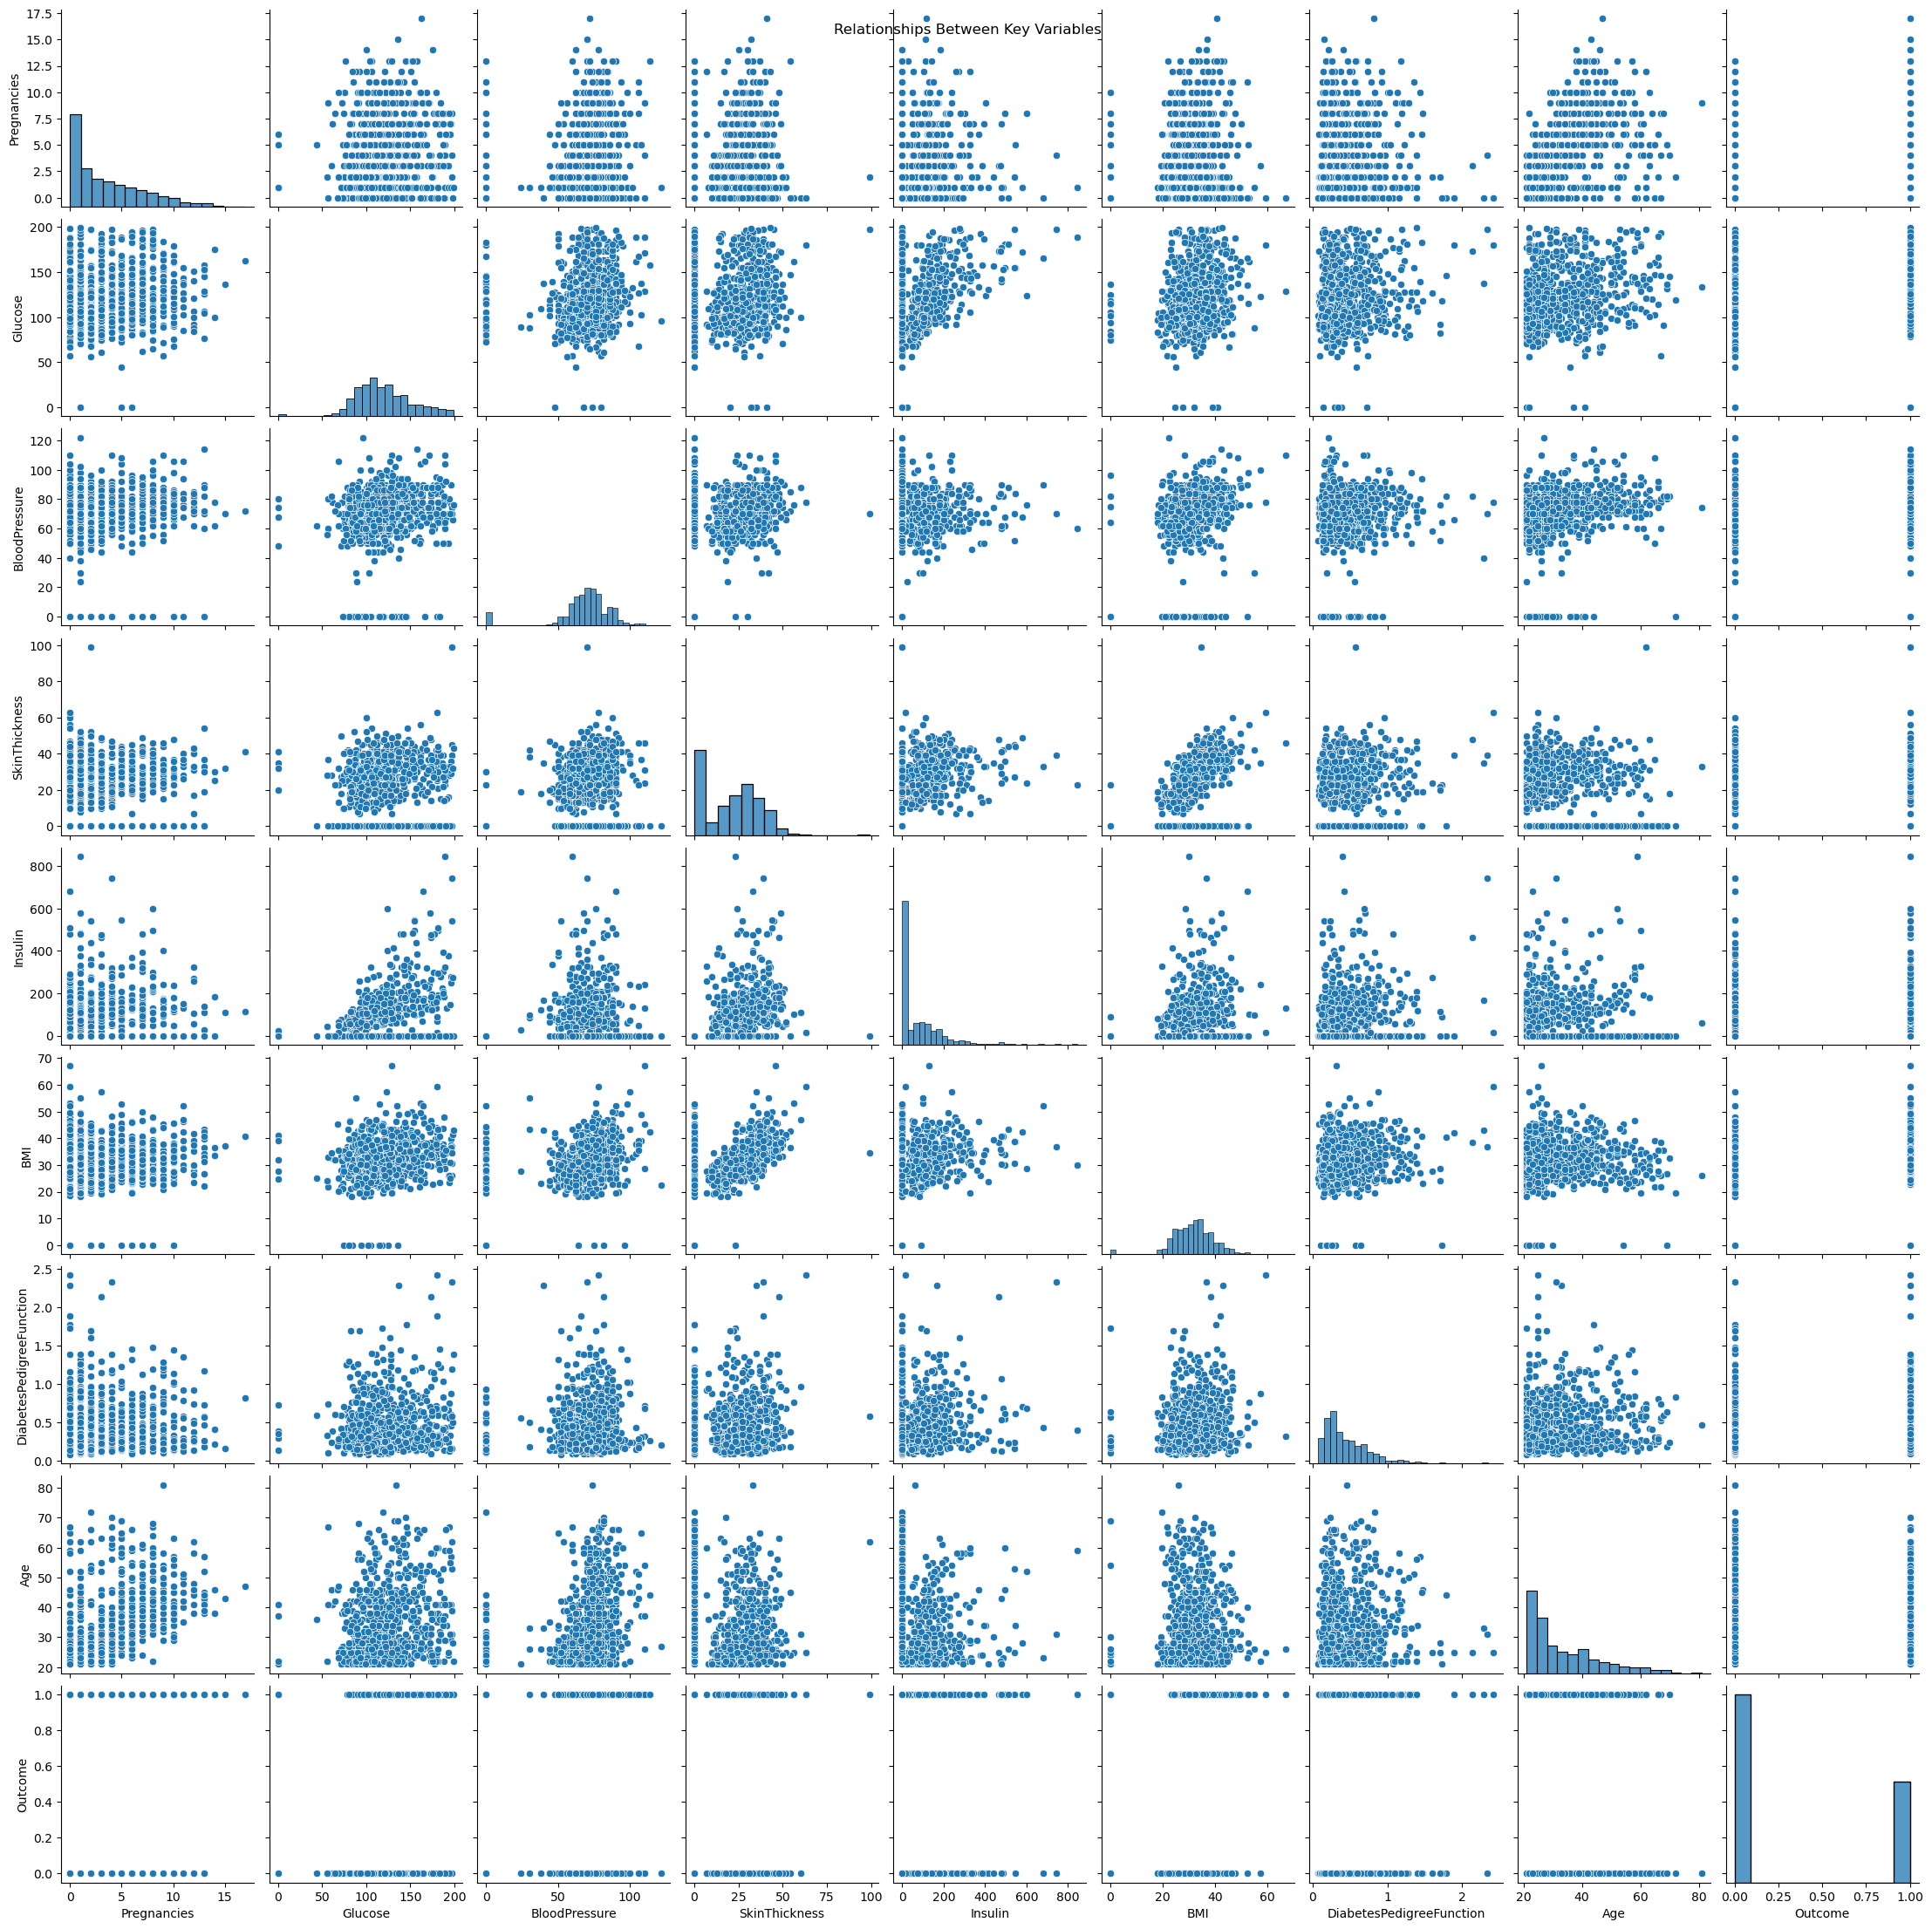

In [21]:
sns.pairplot(df)
plt.suptitle("Relationships Between Key Variables")
plt.show()

- Higher BMI and glucose levels correlate with diabetes (Outcome 1), suggesting obesity and blood sugar are key risk factors.
- Non-diabetic individuals (Outcome 0) tend to cluster in lower BMI and glucose ranges, highlighting healthier metabolic profiles.

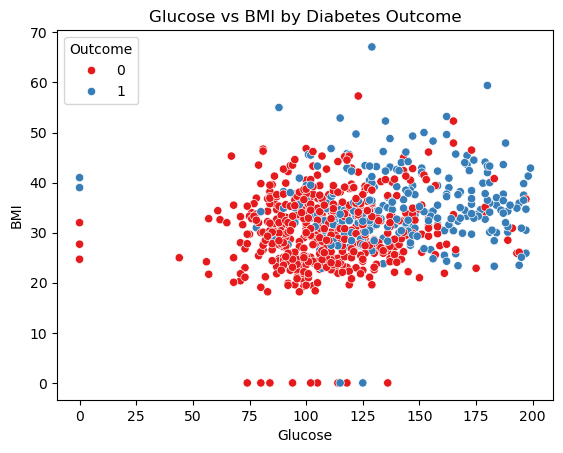

In [4]:
#Patients with high BMI and high Glucose are more likely to be diabetic.

sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='Set1')
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.show()

- As people get older, glucose levels tend to rise, especially in those with diabetes (Outcome 1), showing age is a risk factor.
- Non-diabetics (Outcome 0) generally have lower glucose levels across all ages, highlighting better blood sugar control.

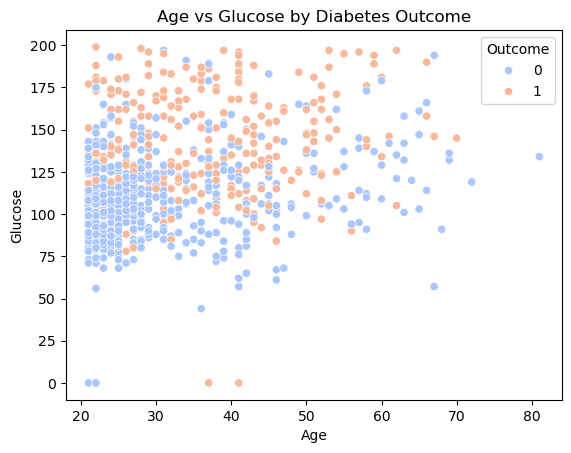

In [5]:
#Younger patients with high Glucose levels may still have a lower diabetes rate.
sns.scatterplot(data=df, x='Age', y='Glucose', hue='Outcome', palette='coolwarm')
plt.title('Age vs Glucose by Diabetes Outcome')
plt.show()


- Higher Diabetes Pedigree Function values (family history risk) are linked to diabetes (Outcome 1), showing genetics matter for diabetes risk.
- This risk increases with age – older individuals with strong family history are more likely to develop diabetes.
- In Simple meaning If diabetes runs in your family, your risk goes up, especially as you get older.

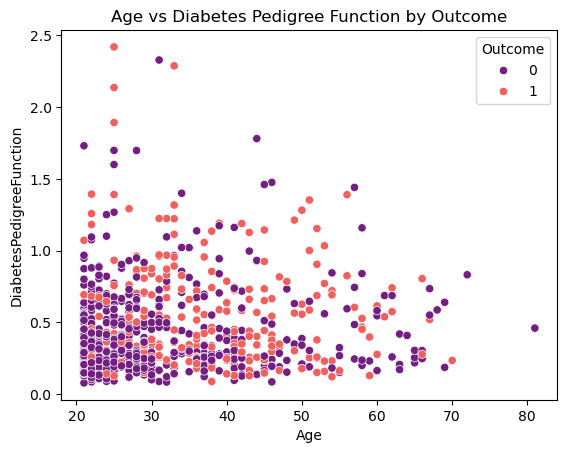

In [6]:
# Diabetes Pedigree Function has more influence in younger patients.
sns.scatterplot(data=df, x='Age', y='DiabetesPedigreeFunction', hue='Outcome', palette='magma')
plt.title('Age vs Diabetes Pedigree Function by Outcome')
plt.show()


- People with high glucose levels are much more likely to have diabetes (Outcome 1) - the graph shows a big jump in diabetes cases when glucose moves from normal to high.
- Normal glucose levels strongly correlate with no diabetes (Outcome 0) - most people in the "Normal" range don't have diabetes, showing good blood sugar control prevents the disease.

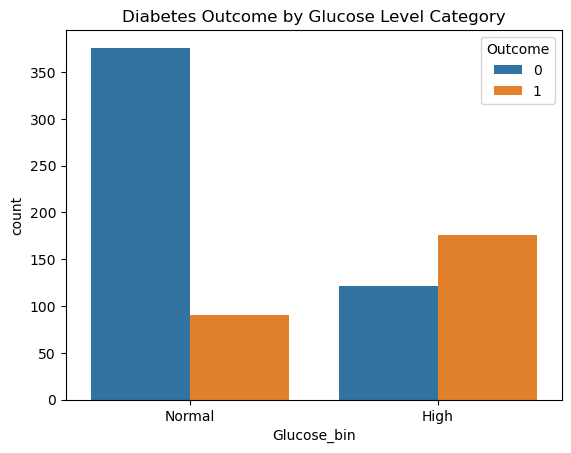

In [7]:
# A Glucose level above 125 is a strong indicator of diabetes.
df['Glucose_bin'] = pd.cut(df['Glucose'], bins=[0, 125, 200], labels=['Normal', 'High'])
sns.countplot(data=df, x='Glucose_bin', hue='Outcome')
plt.title('Diabetes Outcome by Glucose Level Category')
plt.show()


- The older you get, the higher your diabetes risk. Younger people mostly don't have diabetes.

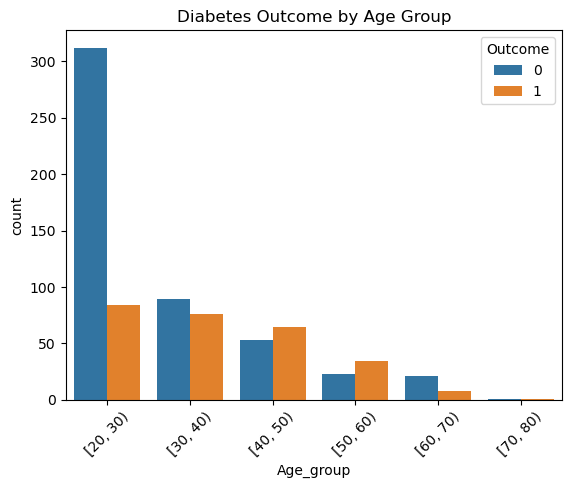

In [8]:
#Most diabetic patients fall in Age group 30–50.
df['Age_group'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80], right=False)
sns.countplot(data=df, x='Age_group', hue='Outcome')
plt.title('Diabetes Outcome by Age Group')
plt.xticks(rotation=45)
plt.show()


- Higher Insulin Levels Link to Diabetes (Outcome 1) – Patients with elevated insulin (especially above 60) are more likely to have diabetes, suggesting insulin resistance plays a role.
- Skin Thickness May Indicate Risk – Thicker skin folds (a marker for obesity/metabolic issues) often appear with high insulin levels in diabetic cases.

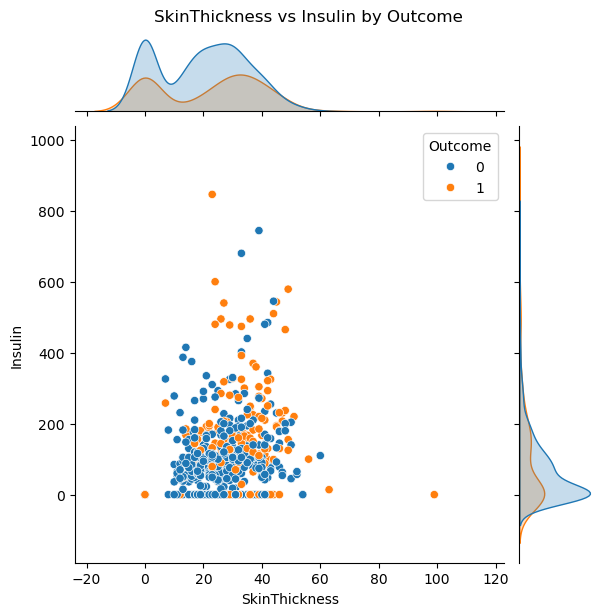

In [9]:
#Low insulin values and low skin thickness may indicate non-diabetic.
sns.jointplot(data=df, x='SkinThickness', y='Insulin', hue='Outcome', kind='scatter')
plt.suptitle('SkinThickness vs Insulin by Outcome', y=1.02)
plt.show()


- More Pregnancies, Higher Diabetes Risk – Women over 30 with multiple pregnancies (2+) show a stronger link to diabetes (Outcome 1), likely due to gestational diabetes history or metabolic stress.
- Zero or Fewer Pregnancies = Lower Risk – Those with 0-1 pregnancies have fewer diabetes cases (Outcome 0), suggesting pregnancy count impacts diabetes likelihood in older women.

C:\Users\HELLO\AppData\Local\Temp\ipykernel_11692\674156322.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['Age'] > 30], x='Outcome', y='Pregnancies', palette='Set3' , ci = None)
C:\Users\HELLO\AppData\Local\Temp\ipykernel_11692\674156322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['Age'] > 30], x='Outcome', y='Pregnancies', palette='Set3' , ci = None)


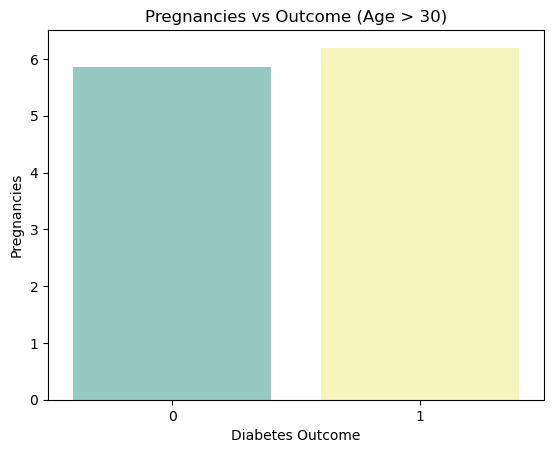

In [10]:
# Pregnancies have a stronger link to diabetes in patients over 30 years old.
sns.barplot(data=df[df['Age'] > 30], x='Outcome', y='Pregnancies', palette='Set3' , ci = None)
plt.title('Pregnancies vs Outcome (Age > 30)')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Pregnancies')
plt.show()



- Higher BMI + Higher Blood Pressure = More Diabetes (Outcome 1) – The graph shows most diabetes cases cluster in the top-right (high BMI and high BP), revealing obesity and hypertension as key risk factors.
- Healthy Range = Lower Diabetes Risk (Outcome 0) – Non-diabetic individuals mostly fall in the bottom-left (normal BMI and BP), highlighting the importance of weight and blood pressure control.

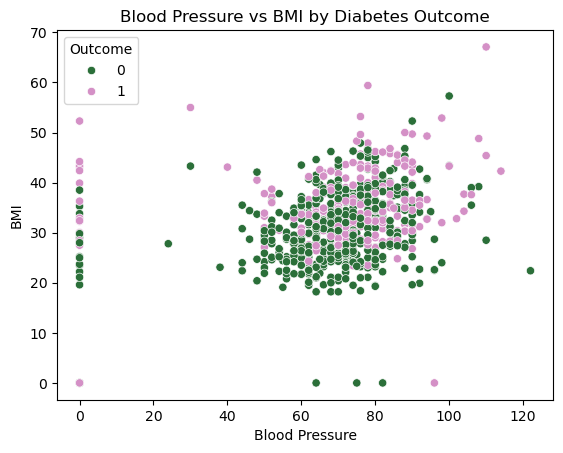

In [11]:
# Patients with both high BloodPressure and high BMI are at higher risk.
sns.scatterplot(data=df, x='BloodPressure', y='BMI', hue='Outcome', palette='cubehelix')
plt.title('Blood Pressure vs BMI by Diabetes Outcome')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.show()


In [12]:
df.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
Glucose_bin                 category
Age_group                   category
dtype: object

In [34]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# outliers detaction 

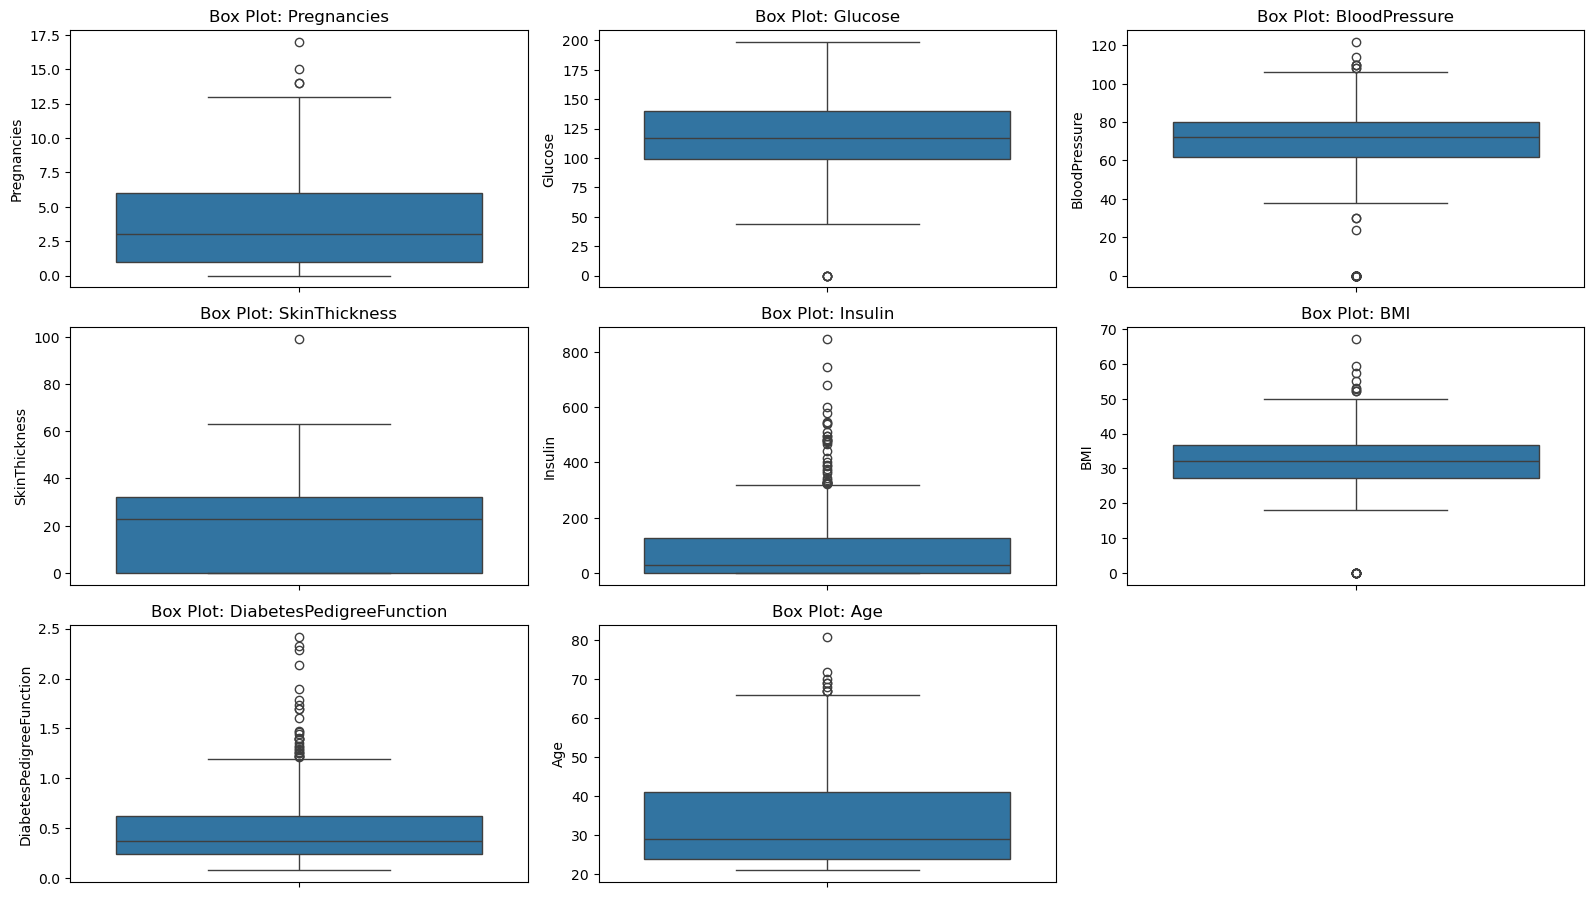

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Outcome')
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot: {col}')

plt.tight_layout()
plt.show()

# Outliers Imputation

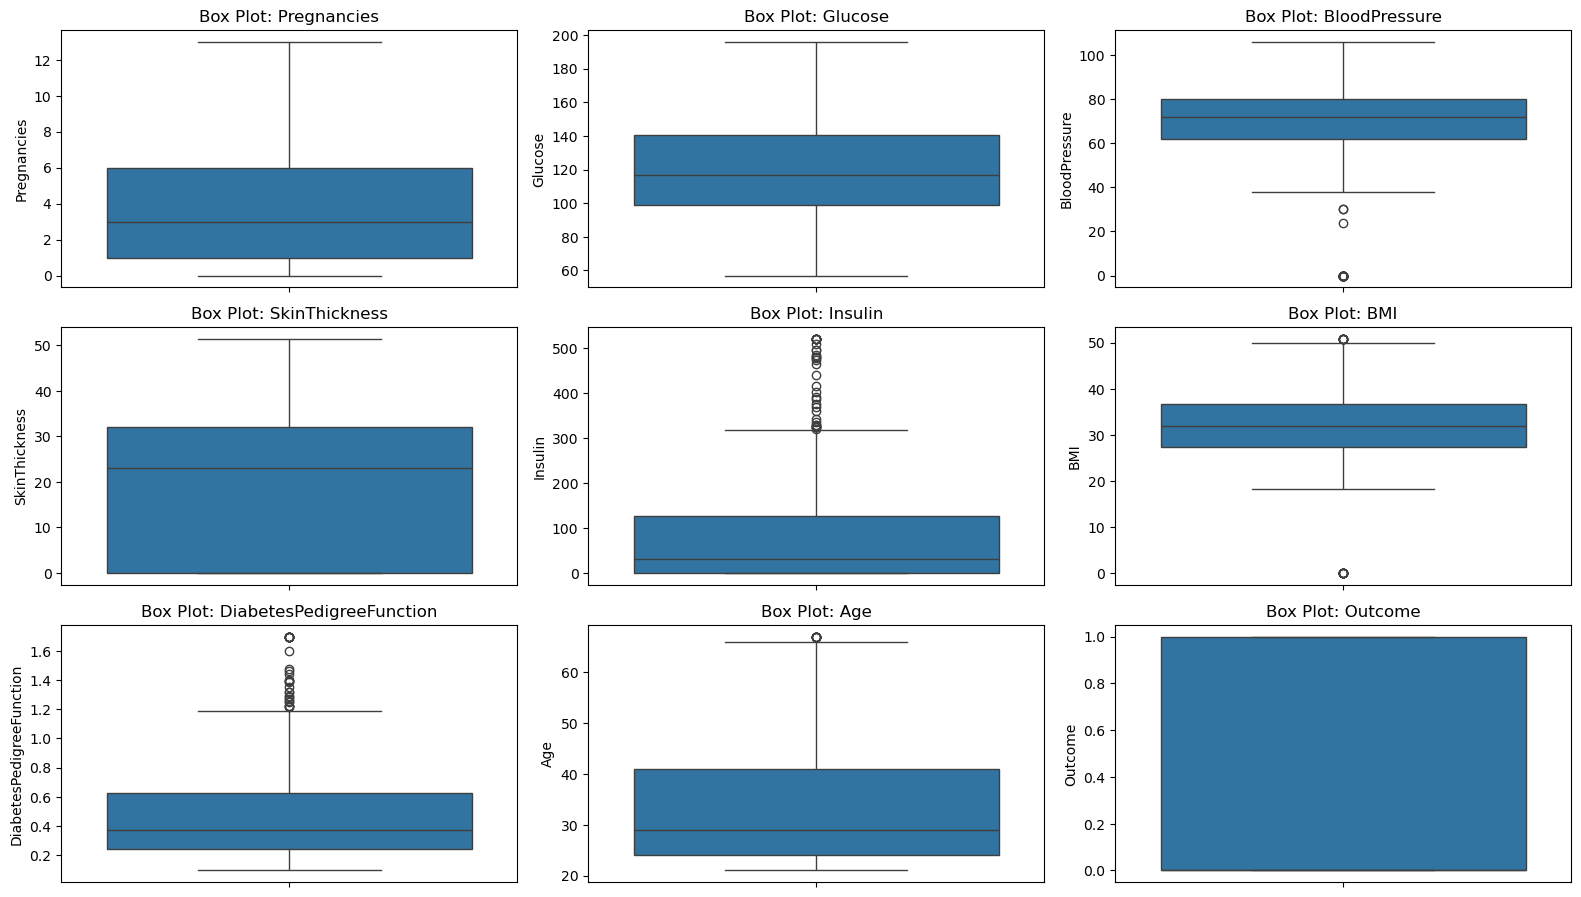

In [17]:
columns_with_outliers = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def cap_outliers(df, column):
    lower = df[column].quantile(0.01)
    upper = df[column].quantile(0.99)
    df[column] = np.where(df[column] < lower, lower,
                          np.where(df[column] > upper, upper, df[column]))

# Apply capping to each column
for col in columns_with_outliers:
    cap_outliers(df, col)

plt.figure(figsize=(16, 12))
for i, col in enumerate(columns_with_outliers + ['Outcome'], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot: {col}')
plt.tight_layout()
plt.show()

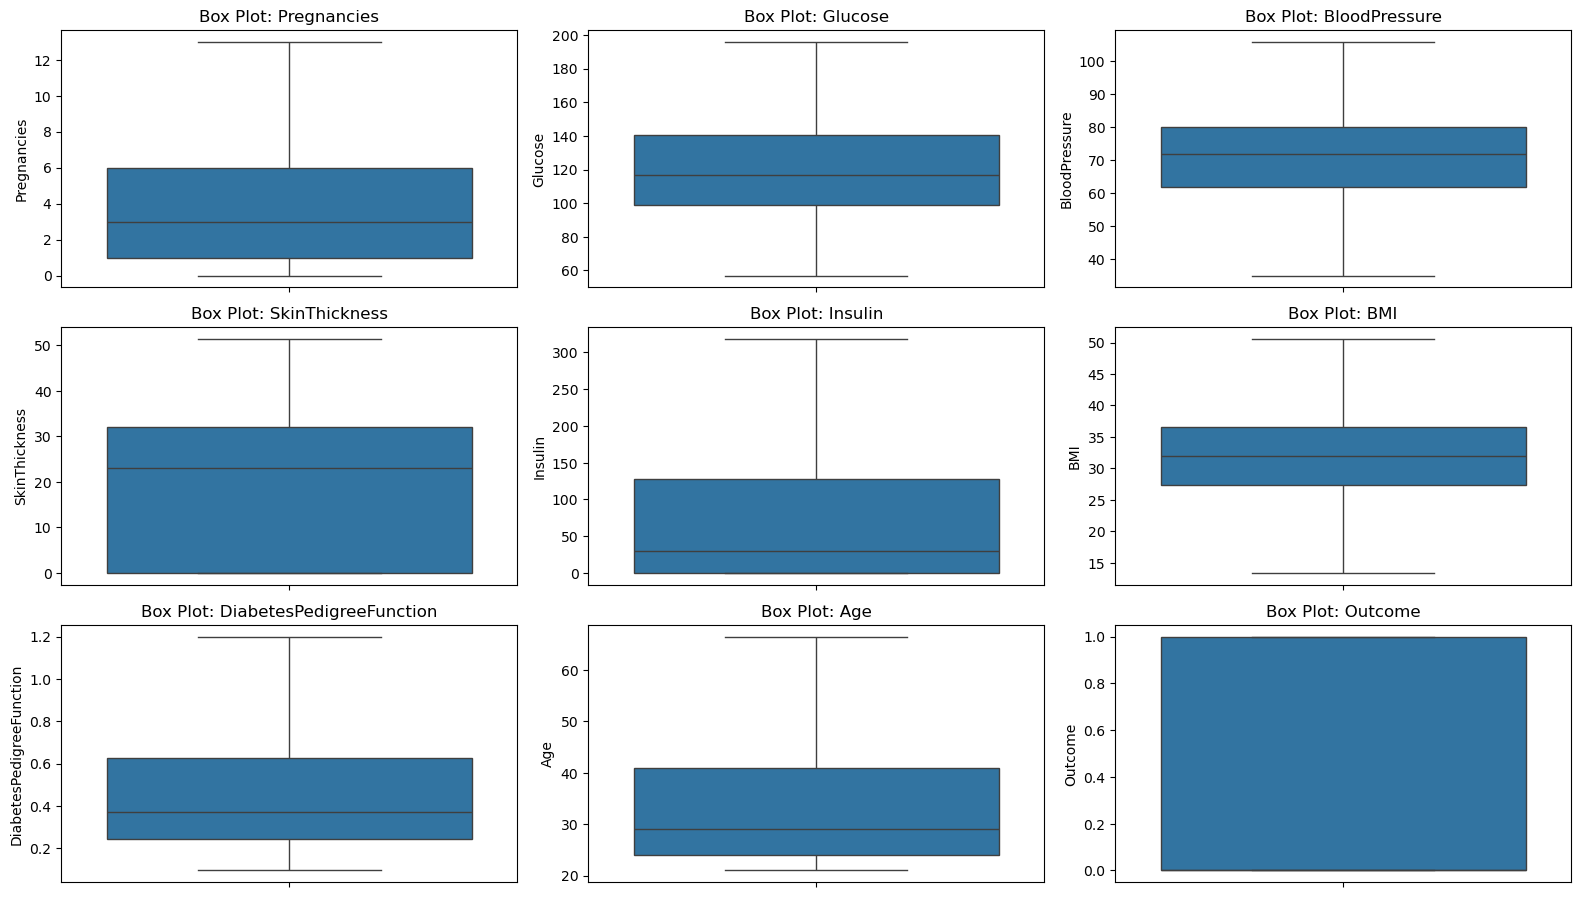

In [19]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot: {col}')
plt.tight_layout()
plt.show()

# Insights

1. Strong Diabetes Predictors: Glucose levels (0.47) and age (0.54) show the strongest correlation with diabetes outcomes, highlighting their importance in risk assessment.
2. Obesity Links: BMI and skin thickness are moderately correlated (0.39), suggesting obesity plays a role in diabetes development.
3. Weak Genetic Influence: Diabetes pedigree function (family history) has minimal correlation with other factors, indicating lifestyle/age matter more.
4. Unexpected Gaps: Blood pressure and insulin levels show surprisingly weak direct links to diabetes outcomes in this dataset.
5. Actionable Insight: Focus on glucose control and weight management for prevention, especially in older adults.